# AffectNet Exploration

## Imports

In [1]:
# disable INFO messages (e.g. from tensorflow)

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printed
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
print("Current Directory: {}".format(os.getcwd()))

Current Directory: /tf/notebooks/Notebooks


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [3]:
import pandas as pd
import numpy as np
import random
import cv2
from tensorflow import keras
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Dataset Paths

In [7]:
# dataset paths

afnet_img = '../AffectNet/train_set/images'
afnet_anno = '../AffectNet/train_set/annotations'

## Dataset Classes

In [5]:
# emotion categories
# classes 8-10 are not facial expressions but classes of uncertainty of annotators
classes = {
    0:'neutral',
    1:'happiness',
    2:'sadness',
    3:'surprise',
    4:'fear',
    5:'disgust',
    6:'anger',
    7:'contempt',
    8:'none',
    9:'uncertain',
    10:'no-face'
}

## Random Image Plot

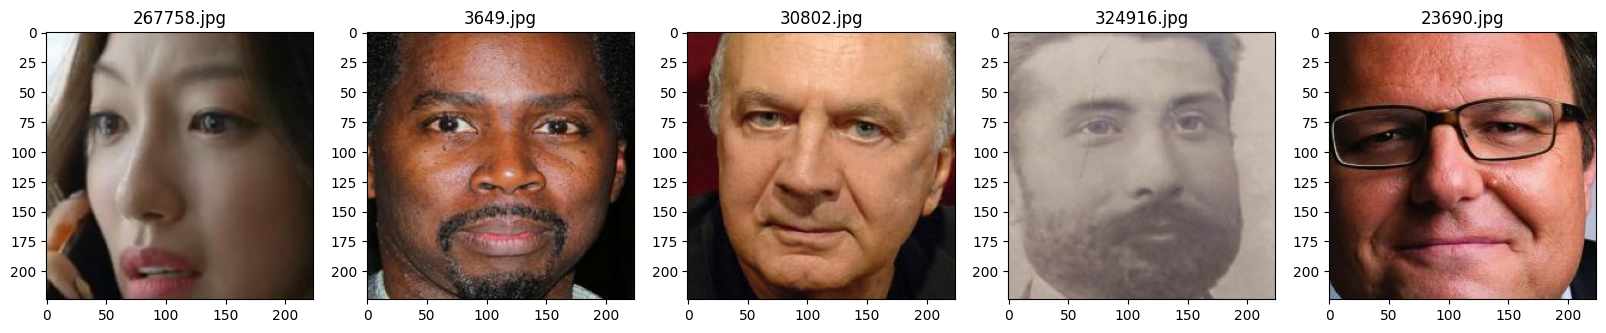

In [8]:
# select & plot random images

plt.figure(figsize=(20,20))

samples = 5
img_list = os.listdir(afnet_img) # list of all images in folder
img_list.sort(key=lambda x: int(os.path.splitext(x)[0]))  # Extract numeric prefix without file extension
img_files = [random.choice(img_list) for i in range(samples)] # random samples
img_indices = [img_list.index(img) for img in img_files] # indices 

for img_file in img_files:
    img_path = os.path.join(afnet_img, img_file)
    img = mpimg.imread(img_path)
    ax = plt.subplot(1,samples,img_files.index(img_file)+1)
    ax.title.set_text(img_file)
    plt.imshow(img)

## Plotting Corresponding Annotations

In [9]:
print('Image indices:\t', img_indices) # print indices
print('Image files:\t', [img_list[index] for index in img_indices]) # test if indices correspond to images shown above

Image indices:	 [185313, 2533, 21299, 225024, 16456]
Image files:	 ['267758.jpg', '3649.jpg', '30802.jpg', '324916.jpg', '23690.jpg']


In [10]:
# load file list of annotations
anno_list = os.listdir(afnet_anno)
# sort list by file name (ascending)
anno_list.sort(key=lambda x: int(x.split('_')[0])) # Assumes the numeric prefix is followed by an underscore
# collect corresponding file names of annotations
anno_files = [[anno_list[img_indices[i]*4+j] for j in range(0,4)] for i in range(0,len(img_indices))]
anno_files

[['267758_aro.npy', '267758_exp.npy', '267758_lnd.npy', '267758_val.npy'],
 ['3649_aro.npy', '3649_exp.npy', '3649_lnd.npy', '3649_val.npy'],
 ['30802_aro.npy', '30802_exp.npy', '30802_lnd.npy', '30802_val.npy'],
 ['324916_aro.npy', '324916_exp.npy', '324916_lnd.npy', '324916_val.npy'],
 ['23690_aro.npy', '23690_exp.npy', '23690_lnd.npy', '23690_val.npy']]

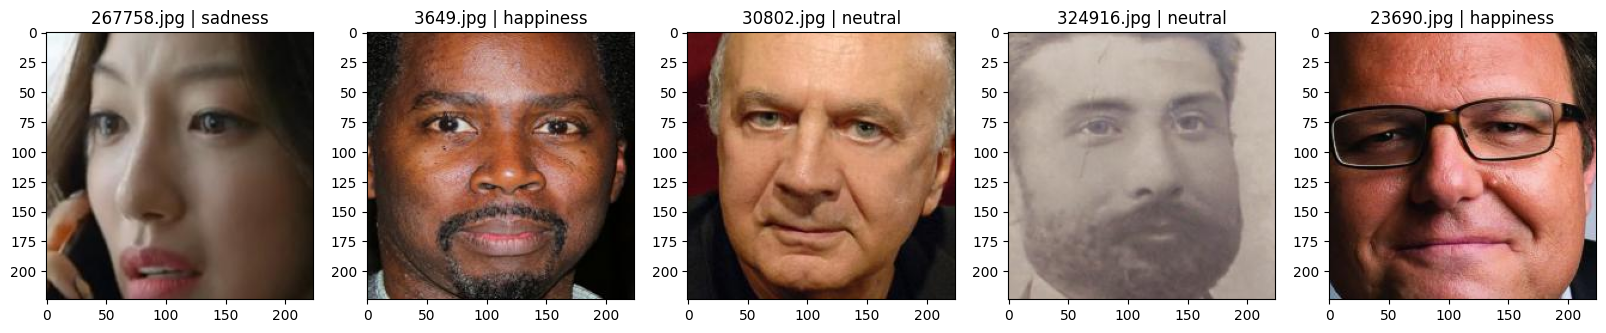

In [11]:
# Plot images again with corresponding classes
plt.figure(figsize=(20,20))
for img_file in img_files:
    img_path = os.path.join(afnet_img, img_file)
    img = mpimg.imread(img_path)
    
    anno_file_path = os.path.join(afnet_anno, anno_files[img_files.index(img_file)][1]) # index 1 is _exp.npy
    exp_class = int(np.load(anno_file_path))
    expression = classes[exp_class]
    
    ax = plt.subplot(1,samples,img_files.index(img_file)+1)
    ax.title.set_text('{} | {}'.format(img_file, expression))
    plt.imshow(img)

In [12]:
# show annotation infos
for img_file in img_files:
    for i in range(4):
        file = anno_files[img_files.index(img_file)][i]
        anno_file_path = os.path.join(afnet_anno, file)
        data = np.load(anno_file_path)
        print('Info from {}:\n'.format(file), data)
        if i == 2:
            print('\t\tLandmark count: {}'.format(len(data)//2)) # landmarks given by (x,y), so divide by 2
        print()

Info from 267758_aro.npy:
 -0.447745

Info from 267758_exp.npy:
 2

Info from 267758_lnd.npy:
 [ 56.84096886  94.6739688   53.14380623 111.83694974  53.25231834
 129.03098787  54.96913495 146.96651646  56.72470588 166.15986135
  62.7083737  184.50689775  69.02532872 200.07431542  77.92719723
 214.57025997  96.52927336 220.69240901 121.39792388 222.24915078
 149.63044983 218.6969844  177.62657439 211.57712305 201.63487889
 198.71168111 218.58602076 177.23951473 226.0849827  151.78814558
 231.11916955 123.54162912 233.47930796  96.19577123  42.12207612
  63.51584055  46.7415917   56.18246101  56.70532872  56.29116118
  67.3550173   58.43410745  76.05923875  63.39161179 101.92
  62.34343154 122.75432526  56.98606586 144.23584775  56.74925477
 166.18629758  62.44436742 185.69522491  73.16298094  87.18560554
  79.24630849  82.28318339  92.83383016  76.73743945 106.99979203
  70.77702422 121.1657539   66.23889273 132.33469671  72.97051903
 137.61053726  81.01979239 140.04076256  92.37093426 

## Plot Facial Landmarks

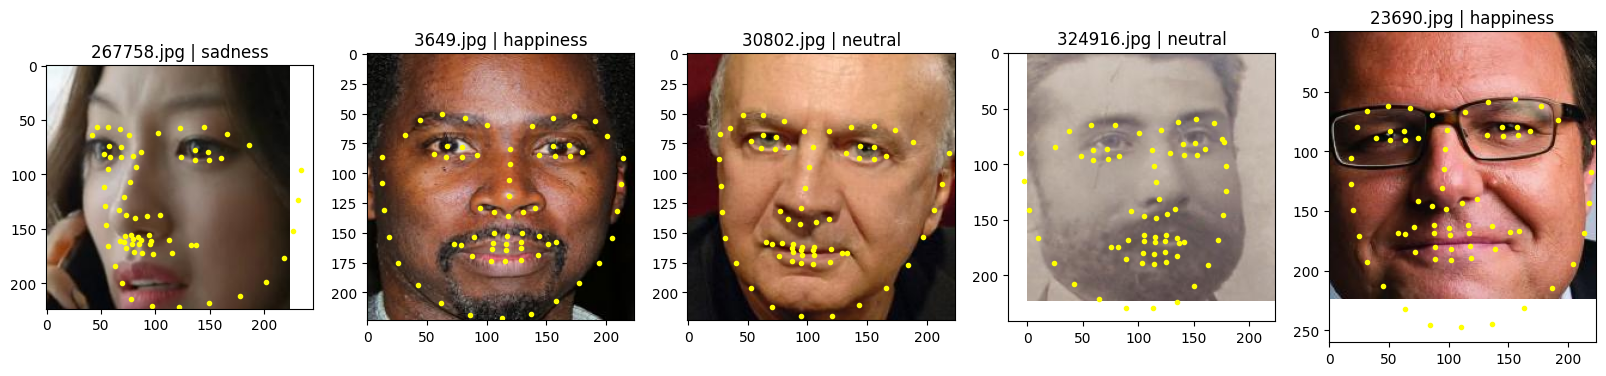

In [14]:
# Plot images again with corresponding classes and landmarks
plt.figure(figsize=(20,20))
for img_file in img_files:
    img_path = os.path.join(afnet_img, img_file)
    img = mpimg.imread(img_path)
    
    exp_file_path = os.path.join(afnet_anno, anno_files[img_files.index(img_file)][1]) # index 1 is _exp.npy
    exp_class = int(np.load(exp_file_path))
    expression = classes[exp_class]
    
    facial_landmarks = np.load(os.path.join(afnet_anno, anno_files[img_files.index(img_file)][2])) # index 2 is _lnd.npy
    # Convert the landmarks to a 2D array with shape (68, 2)
    facial_landmarks = facial_landmarks.reshape((68, 2))
    
    ax = plt.subplot(1,samples,img_files.index(img_file)+1)
    ax.title.set_text('{} | {}'.format(img_file, expression))
    
    plt.imshow(img)
    plt.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='yellow', marker='.')

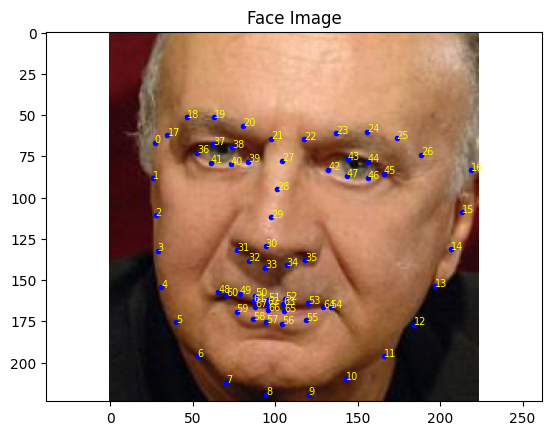

In [88]:
# Load the facial landmarks from the npy file
facial_landmarks = np.load(os.path.join(afnet_anno, '30802_lnd.npy'))

# Convert the landmarks to a 2D array with shape (68, 2)
facial_landmarks = facial_landmarks.reshape((68, 2))

# Load the corresponding face image
face_image = mpimg.imread(os.path.join(afnet_img, '30802.jpg'))

# Create a separate plot for facial landmarks
#plt.figure()
#plt.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='red', marker='.')
#plt.title('Facial Landmarks')
#plt.xlabel('X')
#plt.ylabel('Y')
#plt.gca().invert_yaxis()
#plt.axis('equal')

# Create a plot with the face image
plt.figure()
plt.imshow(face_image)
plt.title('Face Image')
plt.axis('equal')

# Overlay the facial landmarks on the face image
plt.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='blue', marker='.')

# Plot numbers next to each facial landmark point
for i, landmark in enumerate(facial_landmarks):
    plt.text(landmark[0], landmark[1], str(i), color='yellow', fontsize=7)

# Display the plots
plt.show()

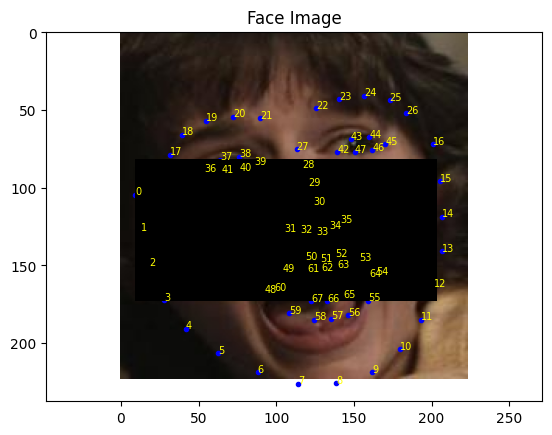

In [33]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load the facial landmarks from the npy file
facial_landmarks = np.load(os.path.join(afnet_anno, '152225_lnd.npy'))

# Convert the landmarks to a 2D array with shape (68, 2)
facial_landmarks = facial_landmarks.reshape((68, 2))

# Load the corresponding face image
face_image = mpimg.imread(os.path.join(afnet_img, '152225.jpg'))

# Create a plot with the face image
fig, ax = plt.subplots()
ax.imshow(face_image)
ax.set_title('Face Image')
ax.axis('equal')

# Overlay the facial landmarks on the face image
ax.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='blue', marker='.')

# Plot numbers next to each facial landmark point
for i, landmark in enumerate(facial_landmarks):
    ax.text(landmark[0], landmark[1], str(i), color='yellow', fontsize=7)

# Calculate the dimensions for the rectangle
width = np.linalg.norm(facial_landmarks[0] - facial_landmarks[16])
height = width / (224 / 105)

# Calculate the coordinates for the rectangle corners
A = facial_landmarks[0]
D = facial_landmarks[16]
AB = facial_landmarks[0] + (facial_landmarks[16] - facial_landmarks[0]) / 2
B = AB - (facial_landmarks[36] - facial_landmarks[45]) * height / (2 * np.linalg.norm(facial_landmarks[36] - facial_landmarks[45]))
C = AB + (facial_landmarks[36] - facial_landmarks[45]) * height / (2 * np.linalg.norm(facial_landmarks[36] - facial_landmarks[45]))
CD = AB

# Create and add the rectangle patch to the plot
rect = patches.Rectangle((A[0], B[1]), width, height, facecolor='black')
ax.add_patch(rect)

# Display the plot
plt.show()


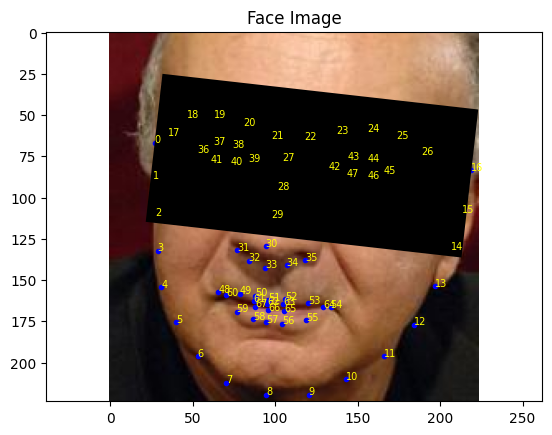

In [151]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Load the facial landmarks from the npy file
facial_landmarks = np.load(os.path.join(afnet_anno, '30802_lnd.npy'))

# Convert the landmarks to a 2D array with shape (68, 2)
facial_landmarks = facial_landmarks.reshape((68, 2))

# Load the corresponding face image
face_image = mpimg.imread(os.path.join(afnet_img, '30802.jpg'))

# Create a plot with the face image
fig, ax = plt.subplots()
ax.imshow(face_image)
ax.set_title('Face Image')
ax.axis('equal')

# Overlay the facial landmarks on the face image
ax.scatter(facial_landmarks[:, 0], facial_landmarks[:, 1], c='blue', marker='.')

# Plot numbers next to each facial landmark point
for i, landmark in enumerate(facial_landmarks):
    ax.text(landmark[0], landmark[1], str(i), color='yellow', fontsize=7)

# Calculate the distance between facial landmark 0 and facial landmark 16
# norm = vector length, euclidean distance = distance
width = np.linalg.norm(facial_landmarks[0] - facial_landmarks[16])

# meta quest 2 aspect ratio (width/height)
aspect_ratio = 224/105

# Calculate the height of the rectangle
height = width / (aspect_ratio)

# Calculate the center point between facial landmark 36 and facial landmark 45 (eyes)
eye_center = facial_landmarks[36] + (facial_landmarks[45] - facial_landmarks[36]) / 2
# Calculate the center point between facial landmark 0 and facial landmark 16 (temporal bones)
temporal_bone_center = facial_landmarks[0] + (facial_landmarks[16] - facial_landmarks[0]) / 2

# Translate eye_center to be exactly between temporal bones
# calc vector v
v = temporal_bone_center - eye_center
# calc direction of straight line
direction_straight = facial_landmarks[45] - facial_landmarks[36]
# norm (lenght) of v
norm_v = np.linalg.norm(v)
# project vector v in direction of straight line of eye_center
projection = np.dot(v, direction_straight) / np.dot(direction_straight, direction_straight) * direction_straight
# translate eye_center by vector projection
center = eye_center + projection


# Calculate the angle between facial landmark 36 and facial landmark 45
oppocite_length = facial_landmarks[45, 1] - facial_landmarks[36, 1] # Gegenkathete, y-axis
adjacent_length = facial_landmarks[45, 0] - facial_landmarks[36, 0] # Ankathete, x-axis
angle = np.arctan2(oppocite_length, adjacent_length)

# Calculate the corner points of the rectangle
#A = horizontal_center - width / 2 * np.array([np.cos(angle), np.sin(angle)])
A = center - width / 2 * np.array([np.cos(angle), np.sin(angle)]) - height / 2 * np.array([-np.sin(angle), np.cos(angle)])

# Create and add the rectangle patch to the plot
rect = patches.Rectangle((A[0], A[1]), width, height, angle=np.degrees(angle), facecolor='black')
ax.add_patch(rect)

# Display the plot
plt.show()